# <center> **Part I** </center>
# <center> **Section 1** </center>

**Down Jones Index Dataset**
<br>
source: https://archive.ics.uci.edu/ml/datasets/dow+jones+index
<br><br/>
**Why Did I Choose This Dataset?**
<br>
I chose this dataset in order to hone my time-series analysis/visualization skills and improve my domain knowledge in the stock markets. Throughout this project, I hope to become well acquainted with the different machine learning models used for time-series analysis, as well as ways to evaluate them and make inferences. Furthermore, learning how the dataset behave with certain time-series models can provide insight into the research at hand, and maybe even prove to be useful for financial analysis.
<br>
Prior to performing statistical analysis, some of the hypotheses I hope to test include the following:
1. Hypothesis 1
2. Hypothesis 2





# <center> **Section 2** </center>
### <center> Initial EDA Prior to Preprocessing Stage </center>

### Modules

In [ ]:
# Data Processing
from google.colab import drive
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# etc
import warnings
warnings.filterwarnings('ignore')

## 2.1

In [ ]:
# Mount google drive for dataset
drive.mount('/content/drive')

# Read data and set dataframe index into datetime object
dj_stocks = pd.read_csv('/content/drive/MyDrive/*Datasets/Dow Jones Index/dow_jones_index.data', index_col=['date'], parse_dates=True)

dj_stocks.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2011-01-07 to 2011-06-24
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   open                                750 non-null    object 
 3   high                                750 non-null    object 
 4   low                                 750 non-null    object 
 5   close                               750 non-null    object 
 6   volume                              750 non-null    int64  
 7   percent_change_price                750 non-null    float64
 8   percent_change_volume_over_last_wk  720 non-null    float64
 9   previous_weeks_volume      

In [ ]:
dj_stocks.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-07,1,AA,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,1,AA,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,1,AA,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,1,AA,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,1,AA,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


It looks like our data contains 750 entries and 16 features, some of which having unusual data types. I would expect for certain features like 'open', 'high', and a few others to be float. I will consider cleaning so that all object types are converted to floats.
<br> </br>
It also seems that the two features: 'percent_weeks_volume' and 'percent_change_volume_over_last_wk' are missing 30 more entries than the rest. Why is that? Does this make sense with the nature of the data type?
<br></br>
Moving forward, I will be filtering the dataset to preserve all 750 entries, but choosing 6 features for the analysis. 

In [ ]:
# Selecting only 6 features
dj_stocks = dj_stocks.loc[:,['open', 'high', 'low', 'close', 'volume', 'percent_return_next_dividend']]

# Converting all data types to numeric ('volume' is already numeric)
dj_stocks['open'] = dj_stocks['open'].str.replace('$', '').astype(float)
dj_stocks['high'] = dj_stocks['high'].str.replace('$', '').astype(float)
dj_stocks['low'] = dj_stocks['low'].str.replace('$', '').astype(float)
dj_stocks['close'] = dj_stocks['close'].str.replace('$', '').astype(float)


dj_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2011-01-07 to 2011-06-24
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          750 non-null    float64
 1   high                          750 non-null    float64
 2   low                           750 non-null    float64
 3   close                         750 non-null    float64
 4   volume                        750 non-null    int64  
 5   percent_return_next_dividend  750 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.0 KB


In [ ]:
dj_stocks.head()

,open,high,low,close,volume,percent_return_next_dividend
date,,,,,,
2011-01-07,15.82,16.72,15.78,16.42,239655616,0.182704
2011-01-14,16.71,16.71,15.64,15.97,242963398,0.187852
2011-01-21,16.19,16.38,15.60,15.79,138428495,0.189994
2011-01-28,15.87,16.63,15.82,16.13,151379173,0.185989
2011-02-04,16.18,17.39,16.18,17.14,154387761,0.175029


## 2.2

### Histograms

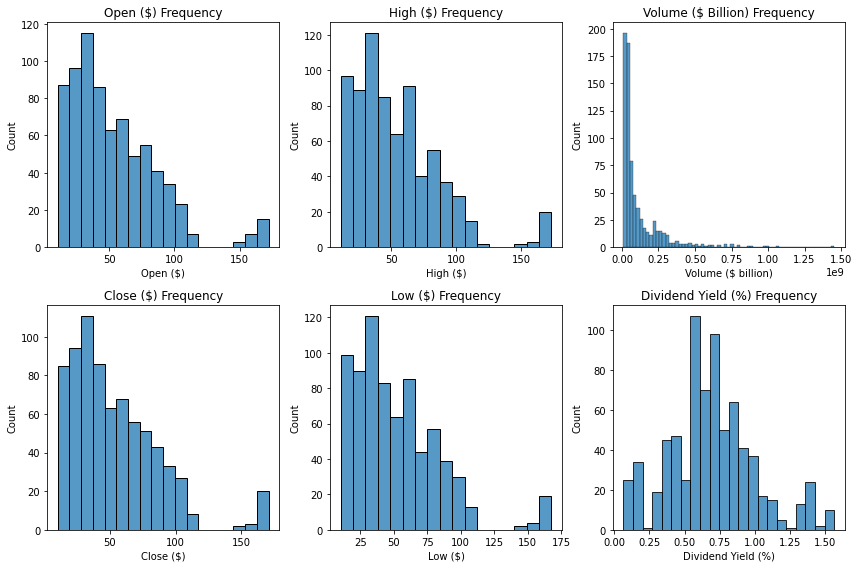

In [ ]:
# Display histogram for each feature
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# open
sns.histplot(dj_stocks['open'], ax=axs[0, 0])
axs[0, 0].set(xlabel='Open ($)', ylabel='Count', title='Open ($) Frequency')

# high
sns.histplot(dj_stocks['high'], ax=axs[0, 1])
axs[0, 1].set(xlabel='High ($)', ylabel='Count', title='High ($) Frequency')

# low
sns.histplot(dj_stocks['low'], ax=axs[1, 1])
axs[1, 1].set(xlabel='Low ($)', ylabel='Count', title='Low ($) Frequency')

# close
sns.histplot(dj_stocks['close'], ax=axs[1, 0])
axs[1, 0].set(xlabel='Close ($)', ylabel='Count', title='Close ($) Frequency')

# volume
sns.histplot(dj_stocks['volume'], ax=axs[0, 2])
axs[0, 2].set(xlabel='Volume ($ billion)', ylabel='Count', title='Volume ($ Billion) Frequency')

# Percent return next dividend
sns.histplot(dj_stocks['percent_return_next_dividend'], ax=axs[1, 2])
axs[1, 2].set(xlabel='Dividend Yield (%)', ylabel='Count', title='Dividend Yield (%) Frequency')

# Adjust figure
fig.tight_layout()

# Show plots
plt.show()

The 'Open', 'High', 'Low', 'Close' features all resemble very similarly to each other in terms of distribution with very minor differences. Expectedly, these distributions make sense to look like each other since many stocks tend to overlap the same prices as they vary over time. Additioinally, these distributions are skewed to the right, indicating most values falling on the left hand side of our histogram with outliers on the right.
<br></br>
On the other hand, the 'Volume' distribution is different from the rest, where it seems to follow an exponential distribution. Whereas a good portion of the volume falls under \$250,000, there are also many outliers falling past \$1 billion.
<br></br>
The dividend yield distribution resembles the normal distribution of all the selected features. Although it isn't the most ideal normal, it is unimodal, containing most of its density towards the middle, and outliers on both the left and right tails.

### Violin Plots

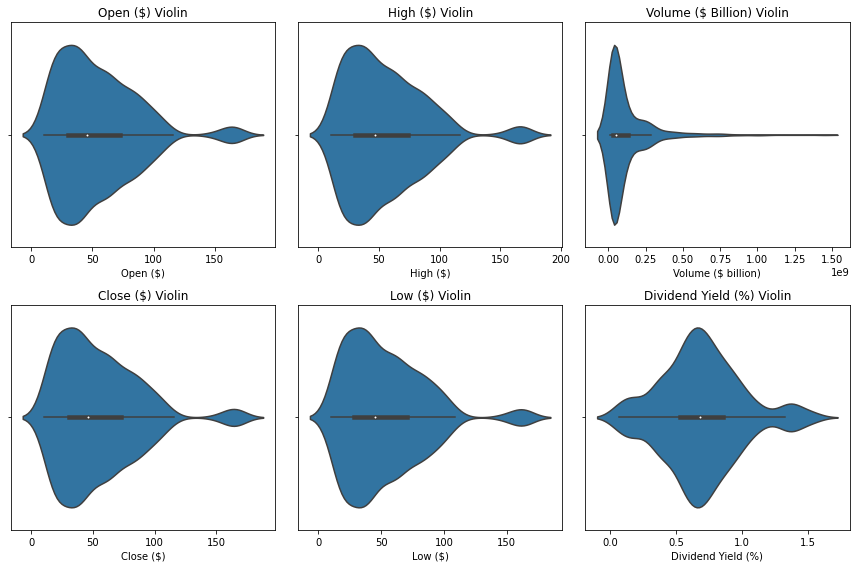

In [ ]:
# Violin plot
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# open
sns.violinplot(dj_stocks['open'], ax=axs[0, 0])
axs[0, 0].set(xlabel='Open ($)', title='Open ($) Violin')

# high
sns.violinplot(dj_stocks['high'], ax=axs[0, 1])
axs[0, 1].set(xlabel='High ($)', title='High ($) Violin')

# low
sns.violinplot(dj_stocks['low'], ax=axs[1, 1])
axs[1, 1].set(xlabel='Low ($)', title='Low ($) Violin')

# close
sns.violinplot(dj_stocks['close'], ax=axs[1, 0])
axs[1, 0].set(xlabel='Close ($)', title='Close ($) Violin')

# volume
sns.violinplot(dj_stocks['volume'], ax=axs[0, 2])
axs[0, 2].set(xlabel='Volume ($ billion)', title='Volume ($ Billion) Violin')

# dividend yield
sns.violinplot(dj_stocks['percent_return_next_dividend'], ax=axs[1, 2])
axs[1, 2].set(xlabel='Dividend Yield (%)', title='Dividend Yield (%) Violin')


# Adjust figure
fig.tight_layout()

# Show plots
plt.show()

Similar to the histograms, these violin plots also seem to infer the same behavior between the open, high, low, close values, as well as the exponential behavior in the volume distribution.

## 2.3

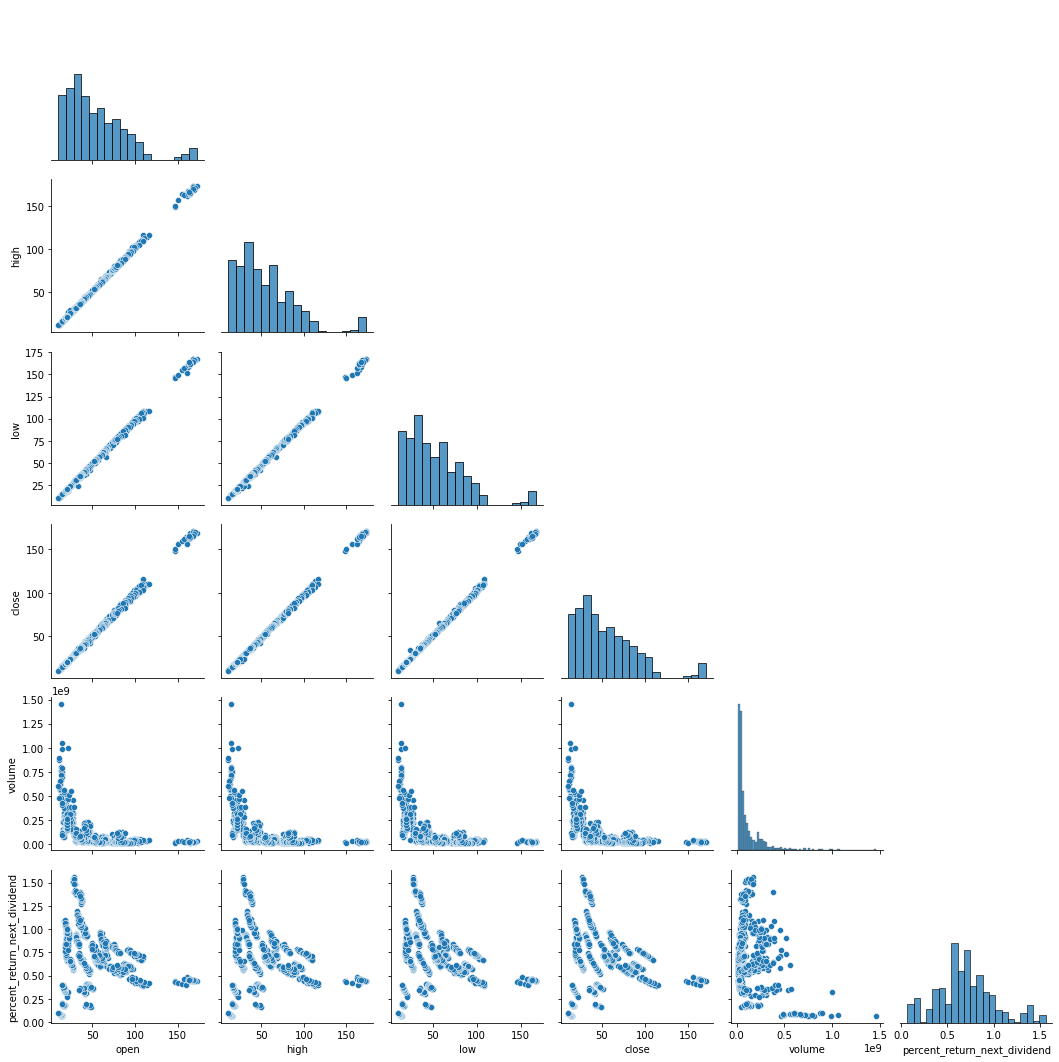

In [ ]:
# Scatter plots of all features since they're numeric
dj_stocks = dj_stocks.reset_index(drop=True)    # for some reason we need this line of code to execute sns.pairplot()
sns.pairplot(dj_stocks, corner=True)


# Show plots
plt.show()

As expected, the scatter plots between the open, high, low, close all exhibit a positive linear trend, indicating a strong positive relationship between all pairs of such features. Interestingly, the pairwise relationship between volume and every other feature mentioned prior also exhibit a relationship similar to other pairs.
<br></br>
The pairplots between the dividend yield and all else also seem to show the same distribution as well. These curvilinear plots could indicate a semi-strong negative relationship with the ohlc (open, high, low, close) variables.

## 2.4
<br>
Since the features I selected from the dataset do not contain any null values, I will not be worried about removing, filling, or imputing any missing values.

## 2.5

### **What Is The Target Variable? And, Why?** 

The target variable in this research project will be the dividend yielf of the stocks in our dataset. This is because the value of a dividend yield proves crucial to financial investors and business managers. These values have the potential to amplify company returns and build a strong momentum for their stocks.
<br></br>
Being able to predict percent dividend yields can infer to analysts which stocks to invest in. Dividends can serve as passive income to a bunch of investors, and could also serve as signals to hold positions in the market. Dividend yields are arguably also important in predicting stock returns, which can become even more important for investors to make better decisions. Nevertheless, forecasting dividend yields is crucial analysis in the investment industry, and through this project, I hope to understand which features are highly correlated to dividend yields, and how well our model can evaluate the predictions.

# <center> **Section 3** </center>
### <center> Final EDA Post Data Preprocessing </center>

## 3.1

### Pearson Correlation Matrix

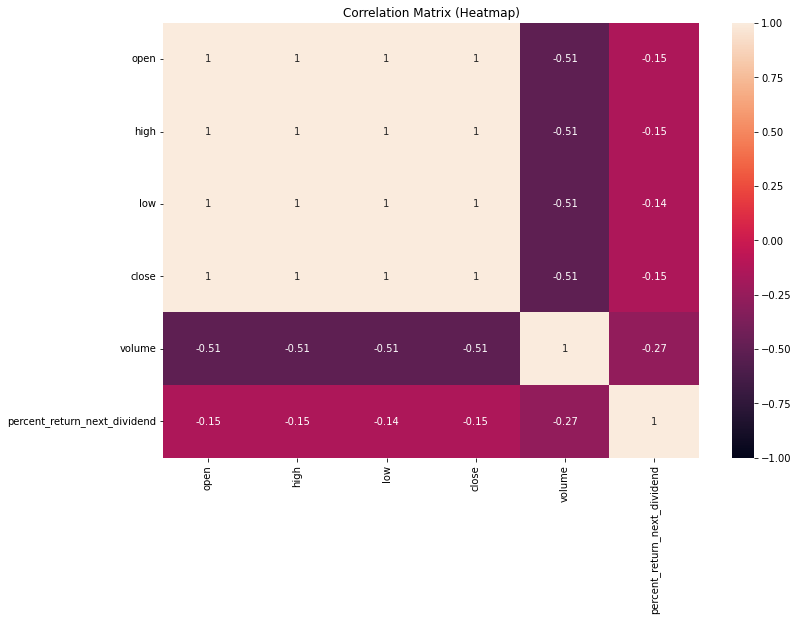

In [ ]:
# Correlation Matrix
corr_matrix = dj_stocks.corr()

# Heatmap of corr_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix (Heatmap)')

plt.show()

The OHLC data all have a perfect strong linear relationship, indicating they all increase when one does, and vice versa.With respect to the next dividend yield, there is a weak negative relationship with the OHLC data, and a semi weak negative relationship with volume. 

## 3.2

### **What Analysis of the OHLCV Data Might It Infer About Forecasting Dividend Yield?**

Based on the visualization plots and the heatmap correlatation matrix, it seems that the target variable, the dividend yield, has a negative relationship with all of the OHLCV features. This infers that such features influence the dividend yield, some more than others. With this in mind, we can expect that volume feature weighs just slightly more than the OHLC features since it possesses a stronger, more negative relationship with the target than the rest by almost twice the rate.
<br></br>
However, it is important to note that the correlation between the target and all other features is weak, and that they are approximately the same for the OHLC data. Further down the project, I am expecting to perform some data reduction technique and eliminating 3 other features. But more analysis will be required.

## 3.3

### **Hypothesis**

As mentioned in *Section 1*, I hope to test a certain hypothesis throughout this research project, and I hope to formulate and refine it in this section.
<br></br>
Since this will be a project predicting the dividend yield of several company stocks, I am going to claim that my model will prove to be 

# <center> **Part 2** </center>
### <center> Machine Learning </center>

### **Should the Data Be Standardized?**

Before answering this question, it's important to identify which machine learning model to use. For this particular project, I will implement a Decision Tree Regressor to predict future dividend yields.
<br> </br>
The Decision Tree model learns decision rules to infer from the data features. This means that these rules fit the dataset, and hence does not require standardization/normalization of the data to pass through the ML model. In such cases, we can expect such models to be invariant under monotonic transformations.

### **Dimensionality Reduction**
As mentioned previously in the Pearson Correlation Matrix section, I am expecting to drop several features since they are highly correlated to each other. This attempt at eliminating multicolinearity will help reduce overfitting in our model, as well as improving the computational efficiency.
<br> </br>
It was mentioned that the OHLC data all indicate the exact same correlation against volume and dividend yield. This infers that all 4 features: Open, High, Low, and Close provide similar information in the relationship between our features, and thus we can drop 2 of them. The reason I am dropping 2 is because the pairs of information 'open and close' and 'high and low' may still provide important data for the ML model.
<br> </br>
Now, which 2 of the 4 features should we retain in our model?

In [ ]:
reduced_dj_stocks = dj_stocks.drop(['high', 'low'], axis=1)

reduced_dj_stocks

,open,close,volume,percent_return_next_dividend
0,15.82,16.42,239655616,0.182704
1,16.71,15.97,242963398,0.187852
2,16.19,15.79,138428495,0.189994
3,15.87,16.13,151379173,0.185989
4,16.18,17.14,154387761,0.175029
...,...,...,...,...
745,80.22,82.63,68230855,0.568801
746,83.28,81.18,78616295,0.578960
747,80.93,79.78,92380844,0.589120
748,80.00,79.02,100521400,0.594786


This reduction in data accounts for almost 50% of the preprocessed dataset, since we are dropping 3 features out of 6.

### **ML Model**

### Train Test Split

In [ ]:
X1 = reduced_dj_stocks.drop(['percent_return_next_dividend'], axis=1)
y1 = reduced_dj_stocks['percent_return_next_dividend']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

### Decision Tree Regressor

In [ ]:
dtr_model = DecisionTreeRegressor().fit(X1_train, y1_train)
reduced_predictions = dtr_model.predict(X1_test)
mse = mean_squared_error(y1_test, reduced_predictions)

mse = pd.DataFrame({'Dim. Red. MSE': mse}, index=[1,])
mse

,Dim. Red. MSE
1,0.042126


### Color Field

### **How Does the Model Perform On the Strongest 2 Features\?**

To identify the strongest 2 features, I will examine the magnitude of the correlation coefficient and extract the 2 highest ones. Since it has been discussed that the OHLC data pretty much represent the same information, we will be viewing them as one instead. The same can be said about their distribution and violin plots. Since the distributions are practically the same, I will treat them as such.

In [ ]:
top_2_stocks = dj_stocks[['low', 'volume', 'percent_return_next_dividend']]

top_2_stocks

,low,volume,percent_return_next_dividend
0,15.78,239655616,0.182704
1,15.64,242963398,0.187852
2,15.60,138428495,0.189994
3,15.82,151379173,0.185989
4,16.18,154387761,0.175029
...,...,...,...
745,80.07,68230855,0.568801
746,80.18,78616295,0.578960
747,79.72,92380844,0.589120
748,78.33,100521400,0.594786


### Train Test Split on Strongest 2 Features

In [ ]:
X2 = top_2_stocks.drop(['percent_return_next_dividend'], axis=1)
y2 = dj_stocks['percent_return_next_dividend']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2)

# Apply ML model
dtr_model2 = DecisionTreeRegressor().fit(X2_train, y2_train)
top_2_predictions = dtr_model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, top_2_predictions)

mse2 = pd.DataFrame({'Top 2 Features MSE': mse2}, index=[1,])
mse2

,Top 2 Features MSE
1,0.064463


### Sklearn Demos

### **Evaluation**

Show accuracy, recall, and/or precision?

# <center> **Summary** </center>